In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'try3day1_6_0.2_4.csv'
df = pd.read_csv(file_path, header=None)
xdata = df[0].to_numpy()
ydata = df[1].to_numpy()
print(xdata)
print(xdata.shape)

xdata_processed = np.arange(xdata[0], xdata[xdata.size - 1]+0.01, 0.01)
print(xdata_processed)
print(xdata_processed.shape)

# plt.plot(data[0].to_numpy(), data[1].to_numpy())
# plt.savefig("fullCurve.png")
# plt.show()

[2.000e-02 3.000e-02 5.000e-02 ... 9.025e+01 9.027e+01 9.028e+01]
(5417,)
[2.000e-02 3.000e-02 4.000e-02 ... 9.026e+01 9.027e+01 9.028e+01]
(9027,)


(9027,)


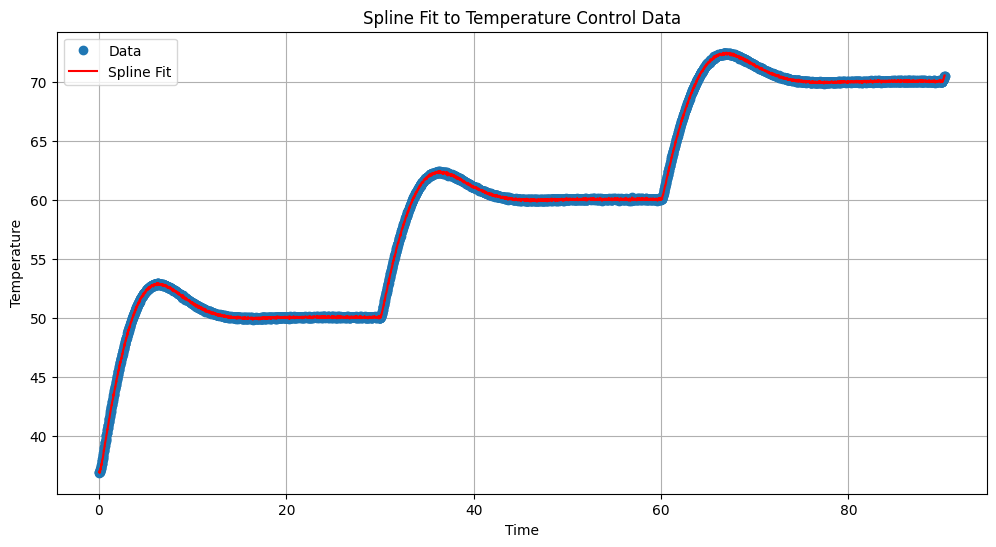

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
#file_path = 'try3day1_6_0.2_4.csv'
#data = pd.read_csv(file_path, header=None)

# Extract the data columns
#xdata = data[0]
#ydata = data[1]

# Fit a spline to the data
# Set the smoothing factor (s) - smaller s leads to a smoother fit
smoothing_factor = 0.5
spl = UnivariateSpline(xdata, ydata, s=smoothing_factor)

# Generate a fine grid for plotting the spline
x_smooth = xdata_processed
y_smooth = spl(x_smooth)

print(y_smooth.shape)

#residuals = abs(y_smooth - ydata)
#print((residuals**2).sum()/residuals.size)

#Plot the original data and the spline fit
plt.figure(figsize=(12, 6))
plt.plot(xdata, ydata, 'o', label='Data')
plt.plot(x_smooth, y_smooth, 'r-', label='Spline Fit')
#plt.plot(xdata, residuals, 'r-', label = 'residuals')
plt.legend()
plt.title('Spline Fit to Temperature Control Data')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


9027
(9027,)
(9027,)


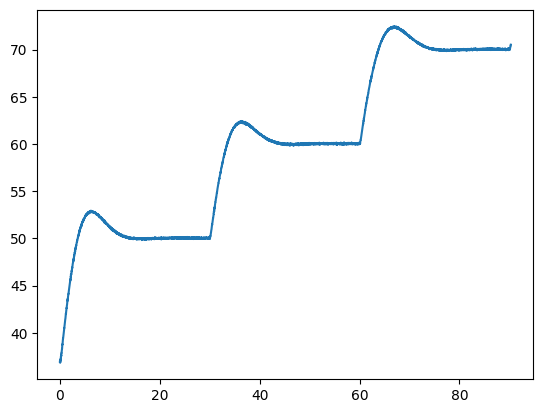

In [9]:
ydata_processed =[]
for x in xdata_processed :
    if x in xdata :
        ydata_processed.append(ydata[np.where(xdata == x)])
    else:
        ydata_processed.append(y_smooth[np.where(xdata_processed == x)])

print(np.array(ydata_processed).size)
ydata_processed = np.array(ydata_processed).reshape(-1)
#xdata_processed = xdata_processed.reshape((9026,1))

print(xdata_processed.shape)
print(ydata_processed.shape)
plt.plot(xdata_processed, ydata_processed)
plt.show()

Coefficients: [0.30025838]
Intercept: 46.38337547200125


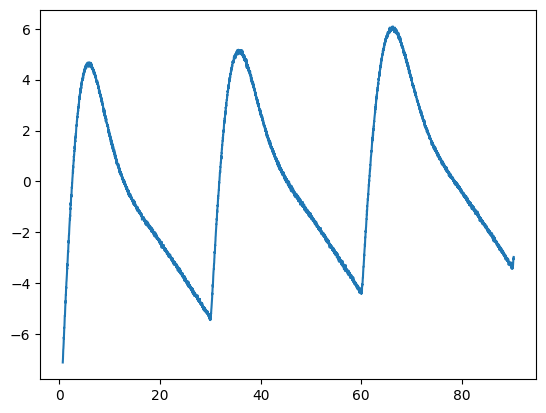

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# file_path = 'try3day1_6_0.2_4.csv'
# df = pd.read_csv(file_path, header=None)


# xdata = df[0].to_numpy().reshape(-1, 1)  # Reshape for sklearn
# ydata = df[1].to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xdata[40:].reshape(-1, 1), ydata[40:], test_size=0.2, random_state=42)

#poly = PolynomialFeatures(degree=3, include_bias=False)
#reshape data to work properly with sklearn
#poly_features = poly.fit_transform(X_train.reshape(-1, 1))

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
#model.fit(poly_features, y_train)



# Predict using the test data
#predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, predictions)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
#print("Mean Squared Error:", mse)

xdata = df[0].to_numpy()

#plt.plot(df[0].to_numpy(), df[1].to_numpy())
#plt.plot(df[0].to_numpy(), model.coef_* df[0].to_numpy() + model.intercept_)
plt.plot(xdata[40:], ydata[40:] - (model.coef_ * xdata[40:] + model.intercept_))
#plt.plot(xdata[40:], ydata[40:] - (model.coef_[0]*(xdata[40:]) + model.coef_[1]*(xdata[40:]**2) + model.intercept_))
#plt.plot(xdata[40:], (model.coef_[0]* xdata[40:] + model.coef_[1]* (xdata[40:]**2) + model.intercept_))
plt.savefig("final_output")
plt.show()



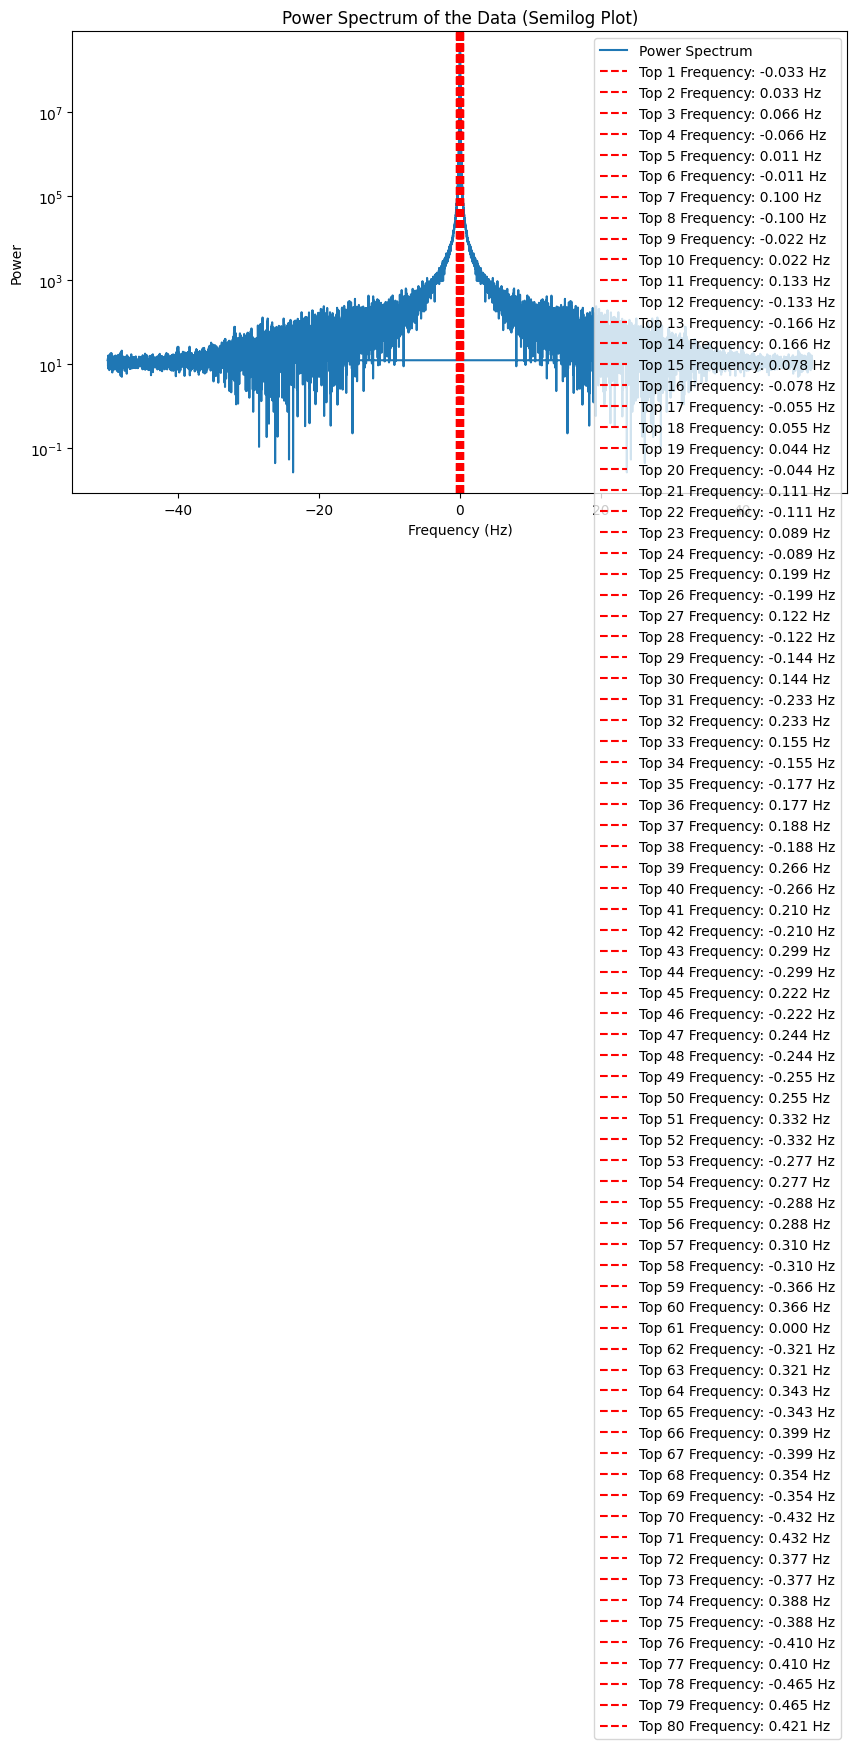

Top 1 Dominant Frequency: -0.0332 Hz with Power: 2.66e+08
Top 2 Dominant Frequency: 0.0332 Hz with Power: 2.66e+08
Top 3 Dominant Frequency: 0.0665 Hz with Power: 7.17e+07
Top 4 Dominant Frequency: -0.0665 Hz with Power: 7.17e+07
Top 5 Dominant Frequency: 0.0111 Hz with Power: 1.76e+07
Top 6 Dominant Frequency: -0.0111 Hz with Power: 1.76e+07
Top 7 Dominant Frequency: 0.0997 Hz with Power: 1.64e+07
Top 8 Dominant Frequency: -0.0997 Hz with Power: 1.64e+07
Top 9 Dominant Frequency: -0.0222 Hz with Power: 4.71e+06
Top 10 Dominant Frequency: 0.0222 Hz with Power: 4.71e+06
Top 11 Dominant Frequency: 0.1329 Hz with Power: 4.46e+06
Top 12 Dominant Frequency: -0.1329 Hz with Power: 4.46e+06
Top 13 Dominant Frequency: -0.1662 Hz with Power: 1.68e+06
Top 14 Dominant Frequency: 0.1662 Hz with Power: 1.68e+06
Top 15 Dominant Frequency: 0.0775 Hz with Power: 1.62e+06
Top 16 Dominant Frequency: -0.0775 Hz with Power: 1.62e+06
Top 17 Dominant Frequency: -0.0554 Hz with Power: 1.38e+06
Top 18 Dominan

In [49]:
# Perform FFT
n = len(xdata_processed)  # Number of data points
dt = 0.01  # Time interval between data points
freq = np.fft.fftfreq(n, dt)  # Frequency bins
fft_values = np.fft.fft(ydata_processed - (model.coef_* xdata_processed + model.intercept_))  # FFT of the data

# Get the power spectrum
power_spectrum = np.abs(fft_values) ** 2

# Find the indices of the top 80 dominant frequencies
top_indices = np.argsort(power_spectrum)[-80:][::-1]
top_frequencies = freq[top_indices]
top_powers = power_spectrum[top_indices]

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.semilogy(freq, power_spectrum, label='Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectrum of the Data (Semilog Plot)')

for i, (freq, power) in enumerate(zip(top_frequencies, top_powers)):
    plt.axvline(x=freq, color='r', linestyle='--', label=f'Top {i+1} Frequency: {freq:.3f} Hz')

plt.legend()
plt.show()

# Print the top 5 dominant frequencies
for i, (freq, power) in enumerate(zip(top_frequencies, top_powers)):
    print(f"Top {i+1} Dominant Frequency: {freq:.4f} Hz with Power: {power:.2e}")

/tmp/ipykernel_1248909/3924644867.py:92: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance = curve_fit(fourier_series, xdata[40:], ydata[40:] - (model.coef_* xdata[40:] + model.intercept_))


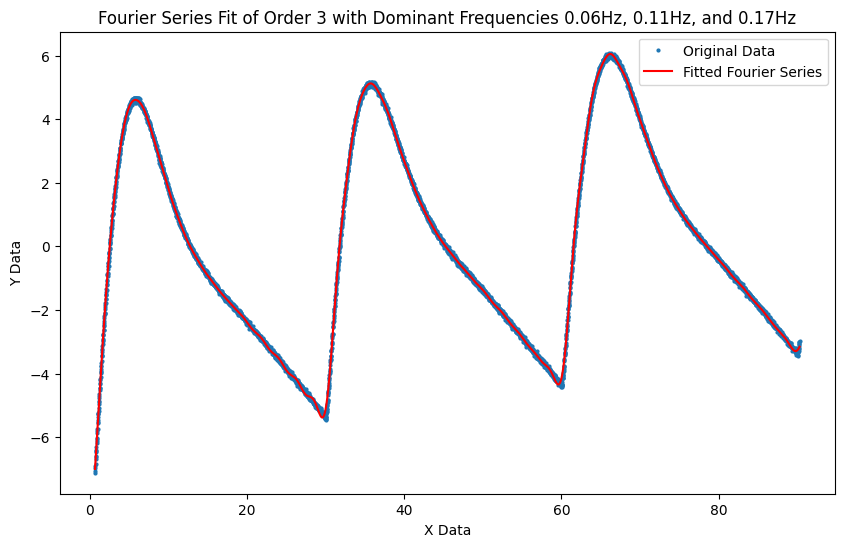

Fitted parameters: [-1.97256079e+05  4.49063906e+00  1.34708883e+00 -1.38900168e+00
 -2.25134948e-01  3.70340018e+01 -6.56525860e+00 -7.67051621e-01
  2.01308180e-01  7.87712771e+00 -2.08049563e+00 -1.98850863e-01
  2.42083358e-01 -8.66803095e-02 -1.21584695e-01 -2.67584815e-01
  1.51673323e-01  6.04191996e-01  6.26615447e-01 -2.65347452e-01
 -1.18247670e+00  3.58850049e-04 -1.47916163e-03 -7.64973949e-03
  1.72660059e-01 -9.77875361e-02 -1.43120643e-02 -1.65622055e-02
  3.16103102e-02  2.23570390e-02 -1.46130185e-01 -3.35698938e-02
  2.61451348e-02  2.26996508e-02  1.08628886e-01  2.23133240e-02
  7.30180110e-03  5.25131923e-02  1.50217902e-02 -4.76034737e-02
 -8.51159275e-02  5.96883579e-02 -2.66507674e-02 -7.06977579e-02
 -1.79582322e-02  3.54932084e-02 -3.04566078e-02  3.00544695e-02
 -9.01550439e-02  1.48778862e-05 -4.59031313e-02 -2.87920150e-02
  2.04930173e-02 -1.59969669e-02 -2.13912758e-02 -5.15394286e-03
 -7.07486158e-03  4.59510106e-03 -8.04700272e-03 -1.90656401e-02
 -4.72

In [50]:
from scipy.optimize import curve_fit

def fourier_series(x, a0, a1, b1, a2, b2, a3, b3, a4, b4, a5, b5, a6, b6, a7, b7, a8, b8, a9, b9, 
                   a10, b10, a11, b11, a12, b12, a13, b13, a14, b14, a15, b15, a16, b16, a17, b17, 
                   a18, b18, a19, b19, a20, b20, a21, b21, a22, b22, a23, b23, a24, b24, a25, b25, 
                   a26, b26, a27, b27, a28, b28, a29, b29, a30, b30, a31, b31, a32, b32, a33, b33,
                   a34, b34, a35, b35, a36, b36, a37, b37, a38, b38, a39, b39, a40, b40):
    f1 = 0.03  # Dominant frequency 1
    f2 = 0.07  # Dominant frequency 2
    f3 = 0.01  # Dominant frequency 3
    f4 = 0.10  # Dominant frequency 4
    f5 = 0.02  # Dominant frequency 5
    f6 = 0.13  # Dominant frequency 6
    f7 = 0.17  # Dominant frequency 7
    f8 = 0.08  # Dominant frequency 8
    f9 = 0.06  # Dominant frequency 9
    f10 = 0.04  # Placeholder frequency 10
    f11 = 0.11  # Placeholder frequency 11
    f12 = 0.09  # Placeholder frequency 12
    f13 = 0.20  # Placeholder frequency 13
    f14 = 0.12  # Placeholder frequency 14
    f15 = 0.14  # Placeholder frequency 15
    f16 = 0.23  # Placeholder frequency 16
    f17 = 0.16  # Placeholder frequency 17
    f18 = 0.18  # Placeholder frequency 18
    f19 = 0.19  # Placeholder frequency 19
    f20 = 0.27  # Placeholder frequency 20
    f21 = 0.21  # Placeholder frequency 21
    f22 = 0.30  # Placeholder frequency 22
    f23 = 0.22  # Placeholder frequency 23
    f24 = 0.24  # Placeholder frequency 24
    f25 = 0.25  # Placeholder frequency 25
    f26 = 0.33  # Placeholder frequency 26
    f27 = 0.28  # Placeholder frequency 27
    f28 = 0.29  # Placeholder frequency 28
    f29 = 0.31  # Placeholder frequency 29
    f30 = 0.37  # Placeholder frequency 30
    f31 = 0.0001  # Placeholder frequency 31
    f32 = 0.32  # Placeholder frequency 32
    f33 = 0.34  # Placeholder frequency 33
    f34 = 0.40  # Placeholder frequency 34
    f35 = 0.35  # Placeholder frequency 35
    f36 = 0.43  # Placeholder frequency 36
    f37 = 0.38  # Placeholder frequency 37
    f38 = 0.39  # Placeholder frequency 38
    f39 = 0.41  # Placeholder frequency 39
    f40 = 0.46  # Placeholder frequency 40

    return (a0 +
            a1 * np.cos(2 * np.pi * f1 * x) + b1 * np.sin(2 * np.pi * f1 * x) +
            a2 * np.cos(2 * np.pi * f2 * x) + b2 * np.sin(2 * np.pi * f2 * x) +
            a3 * np.cos(2 * np.pi * f3 * x) + b3 * np.sin(2 * np.pi * f3 * x) +
            a4 * np.cos(2 * np.pi * f4 * x) + b4 * np.sin(2 * np.pi * f4 * x) +
            a5 * np.cos(2 * np.pi * f5 * x) + b5 * np.sin(2 * np.pi * f5 * x) +
            a6 * np.cos(2 * np.pi * f6 * x) + b6 * np.sin(2 * np.pi * f6 * x) +
            a7 * np.cos(2 * np.pi * f7 * x) + b7 * np.sin(2 * np.pi * f7 * x) +
            a8 * np.cos(2 * np.pi * f8 * x) + b8 * np.sin(2 * np.pi * f8 * x) +
            a9 * np.cos(2 * np.pi * f9 * x) + b9 * np.sin(2 * np.pi * f9 * x) +
            a10 * np.cos(2 * np.pi * f10 * x) + b10 * np.sin(2 * np.pi * f10 * x) +
            a11 * np.cos(2 * np.pi * f11 * x) + b11 * np.sin(2 * np.pi * f11 * x) +
            a12 * np.cos(2 * np.pi * f12 * x) + b12 * np.sin(2 * np.pi * f12 * x) +
            a13 * np.cos(2 * np.pi * f13 * x) + b13 * np.sin(2 * np.pi * f13 * x) +
            a14 * np.cos(2 * np.pi * f14 * x) + b14 * np.sin(2 * np.pi * f14 * x) +
            a15 * np.cos(2 * np.pi * f15 * x) + b15 * np.sin(2 * np.pi * f15 * x) +
            a16 * np.cos(2 * np.pi * f16 * x) + b16 * np.sin(2 * np.pi * f16 * x) +
            a17 * np.cos(2 * np.pi * f17 * x) + b17 * np.sin(2 * np.pi * f17 * x) +
            a18 * np.cos(2 * np.pi * f18 * x) + b18 * np.sin(2 * np.pi * f18 * x) +
            a19 * np.cos(2 * np.pi * f19 * x) + b19 * np.sin(2 * np.pi * f19 * x) +
            a20 * np.cos(2 * np.pi * f20 * x) + b20 * np.sin(2 * np.pi * f20 * x) +
            a21 * np.cos(2 * np.pi * f21 * x) + b21 * np.sin(2 * np.pi * f21 * x) +
            a22 * np.cos(2 * np.pi * f22 * x) + b22 * np.sin(2 * np.pi * f22 * x) +
            a23 * np.cos(2 * np.pi * f23 * x) + b23 * np.sin(2 * np.pi * f23 * x) +
            a24 * np.cos(2 * np.pi * f24 * x) + b24 * np.sin(2 * np.pi * f24 * x) +
            a25 * np.cos(2 * np.pi * f25 * x) + b25 * np.sin(2 * np.pi * f25 * x) +
            a26 * np.cos(2 * np.pi * f26 * x) + b26 * np.sin(2 * np.pi * f26 * x) +
            a27 * np.cos(2 * np.pi * f27 * x) + b27 * np.sin(2 * np.pi * f27 * x) +
            a28 * np.cos(2 * np.pi * f28 * x) + b28 * np.sin(2 * np.pi * f28 * x) +
            a29 * np.cos(2 * np.pi * f29 * x) + b29 * np.sin(2 * np.pi * f29 * x) +
            a30 * np.cos(2 * np.pi * f30 * x) + b30 * np.sin(2 * np.pi * f30 * x) +
            a31 * np.cos(2 * np.pi * f31 * x) + b31 * np.sin(2 * np.pi * f31 * x) +
            a32 * np.cos(2 * np.pi * f32 * x) + b32 * np.sin(2 * np.pi * f32 * x) +
            a33 * np.cos(2 * np.pi * f33 * x) + b33 * np.sin(2 * np.pi * f33 * x) +
            a34 * np.cos(2 * np.pi * f34 * x) + b34 * np.sin(2 * np.pi * f34 * x) +
            a35 * np.cos(2 * np.pi * f35 * x) + b35 * np.sin(2 * np.pi * f35 * x) +
            a36 * np.cos(2 * np.pi * f36 * x) + b36 * np.sin(2 * np.pi * f36 * x) +
            a37 * np.cos(2 * np.pi * f37 * x) + b37 * np.sin(2 * np.pi * f37 * x) +
            a38 * np.cos(2 * np.pi * f38 * x) + b38 * np.sin(2 * np.pi * f38 * x) +
            a39 * np.cos(2 * np.pi * f39 * x) + b39 * np.sin(2 * np.pi * f39 * x) +
            a40 * np.cos(2 * np.pi * f40 * x) + b40 * np.sin(2 * np.pi * f40 * x))

# Fit the Fourier series to the data
params, params_covariance = curve_fit(fourier_series, xdata[40:], ydata[40:] - (model.coef_* xdata[40:] + model.intercept_))



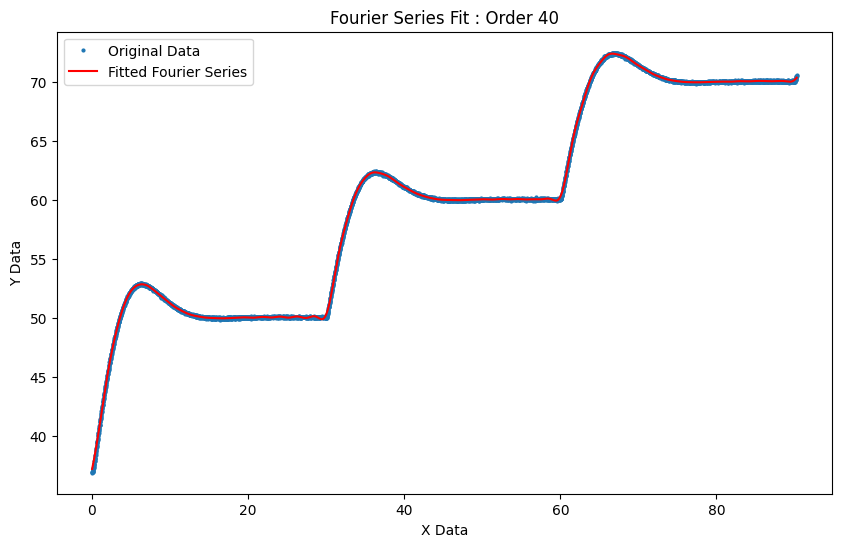

Fitted parameters for fourier curve part : [-1.97256079e+05  4.49063906e+00  1.34708883e+00 -1.38900168e+00
 -2.25134948e-01  3.70340018e+01 -6.56525860e+00 -7.67051621e-01
  2.01308180e-01  7.87712771e+00 -2.08049563e+00 -1.98850863e-01
  2.42083358e-01 -8.66803095e-02 -1.21584695e-01 -2.67584815e-01
  1.51673323e-01  6.04191996e-01  6.26615447e-01 -2.65347452e-01
 -1.18247670e+00  3.58850049e-04 -1.47916163e-03 -7.64973949e-03
  1.72660059e-01 -9.77875361e-02 -1.43120643e-02 -1.65622055e-02
  3.16103102e-02  2.23570390e-02 -1.46130185e-01 -3.35698938e-02
  2.61451348e-02  2.26996508e-02  1.08628886e-01  2.23133240e-02
  7.30180110e-03  5.25131923e-02  1.50217902e-02 -4.76034737e-02
 -8.51159275e-02  5.96883579e-02 -2.66507674e-02 -7.06977579e-02
 -1.79582322e-02  3.54932084e-02 -3.04566078e-02  3.00544695e-02
 -9.01550439e-02  1.48778862e-05 -4.59031313e-02 -2.87920150e-02
  2.04930173e-02 -1.59969669e-02 -2.13912758e-02 -5.15394286e-03
 -7.07486158e-03  4.59510106e-03 -8.04700272e-0

In [56]:
# Plot the original data and the fitted curve
x_fit = xdata
y_fit = fourier_series(x_fit, *params)

plt.figure(figsize=(10, 6))
plt.plot(xdata, ydata, 'o', label='Original Data', markersize=2)
plt.plot(x_fit, y_fit + (model.coef_* xdata + model.intercept_), label='Fitted Fourier Series', color='red')
plt.legend()
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Fourier Series Fit : Order 40')
plt.show()

print("Fitted parameters for fourier curve part :", params)
print("Fitted parameters for linear curve part : coeffitient = " + str(model.coef_) + " ; intercept = " + str(model.intercept_))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path = 'try3day1_6_0.2_4.csv'
df = pd.read_csv(file_path, header=None)
xdata = df[0].to_numpy()
ydata = df[1].to_numpy()


xdata_processed = np.arange(xdata[0], xdata[xdata.size - 1]+0.01, 0.01)


In [ ]:
from scipy.interpolate import UnivariateSpline

# Fit a spline to the data
# Set the smoothing factor (s) - smaller s leads to a smoother fit
smoothing_factor = 0.5
spl = UnivariateSpline(xdata, ydata, s=smoothing_factor)

# Generate a fine grid for plotting the spline
x_smooth = xdata_processed
y_smooth = spl(x_smooth)


In [ ]:
ydata_processed =[]
for x in xdata_processed :
    if x in xdata :
        ydata_processed.append(ydata[np.where(xdata == x)])
    else:
        ydata_processed.append(y_smooth[np.where(xdata_processed == x)])

print(np.array(ydata_processed).size)
ydata_processed = np.array(ydata_processed).reshape(-1)

In [ ]:
import pandas as pd
import numpy as np

file_path = 'try3day1_6_0.2_4.csv'
df = pd.read_csv(file_path, header=None)
xdata = df[0].to_numpy()
ydata = df[1].to_numpy()



In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline


def data_processing_for_fft(xdata, ydata, step_size=0.01, smoothing_factor=0.5) :
    #make sure xdata and ydata are numpy array
    xdata_processed = np.arange(xdata[0], xdata[xdata.size - 1]+step_size, step_size)
    # Fit a spline to the data
    # Set the smoothing factor (s) - smaller s leads to a smoother fit
    spl = UnivariateSpline(xdata, ydata, s=smoothing_factor)

    # Generate a fine grid for plotting the spline
    y_smooth = spl(xdata_processed)
    ydata_processed =[]
    for x in xdata_processed :
        if x in xdata :
            ydata_processed.append(ydata[np.where(xdata == x)])
        else:
            ydata_processed.append(y_smooth[np.where(xdata_processed == x)])

    ydata_processed = np.array(ydata_processed).reshape(-1)

    return xdata_processed, ydata_processed


xdata_processed, ydata_processed = data_processing_for_fft(xdata, ydata)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def fit_linear_regression(xdata, ydata, test_size_ratio = 0.2):
    # Ensure xdata and ydata are numpy arrays
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(xdata.reshape(-1, 1), ydata, test_size=test_size_ratio, random_state=42)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    return model


model = fit_linear_regression(xdata, ydata)

In [79]:
import numpy as np

def extract_dominant_frequencies(xdata_processed, ydata_processed, model, n, rounding = 3):
    # Perform FFT
    data_len = len(xdata_processed)  # Number of data points
    dt = xdata_processed[1] - xdata_processed[0]  # Time interval between data points
    freq = np.fft.fftfreq(data_len, dt)  # Frequency bins
    fft_values = np.fft.fft(ydata_processed - (model.coef_ * xdata_processed + model.intercept_))  # FFT of the data

    # Get the power spectrum
    power_spectrum = np.abs(fft_values) ** 2

    # Find the indices of frequencies with power >= 10^n
    significant_indices = np.where(power_spectrum >= 10**n)[0]

    # Extract the corresponding frequencies and powers
    significant_frequencies = freq[significant_indices]
    significant_powers = power_spectrum[significant_indices]

    # Sort the frequencies based on their corresponding power
    sorted_indices = np.argsort(significant_powers)[::-1]
    sorted_frequencies = significant_frequencies[sorted_indices]
    sorted_powers = significant_powers[sorted_indices]

    # Filter to keep only positive frequencies
    positive_frequencies = sorted_frequencies[sorted_frequencies > 0]
    
    return np.round(positive_frequencies, rounding)


gg = extract_dominant_frequencies(xdata_processed, ydata_processed, model, 4)

[0.03 0.07 0.01 0.1  0.02 0.13 0.17 0.08 0.06 0.04 0.11 0.09 0.2  0.12
 0.14 0.23 0.16 0.18 0.19 0.27 0.21 0.3  0.22 0.24 0.25 0.33 0.28 0.29
 0.31 0.37 0.32 0.34 0.4  0.35 0.43 0.38 0.39 0.41 0.47 0.42 0.44 0.45
 0.5  0.48 0.49 0.53 0.51 0.56 0.54 0.52 0.58 0.55 0.6  0.59 0.61 0.63
 0.62 0.65 0.64 0.68 0.66 0.69 0.71 0.7  0.73 0.74 0.72 0.78 0.75 0.76
 0.8  0.79 0.82 0.81 0.84 0.83 0.85 0.91 0.88 0.89 0.92 0.86 0.94 0.9
 0.93 0.97 1.01 0.99 0.95 0.96 1.04 1.07 1.03]


In [89]:
def generate_fourier_series_function(frequencies):
    # Create the function definition string
    func_def = "def fourier_series(x, a0, " + ", ".join(
        f"a{i+1}, b{i+1}" for i in range(len(frequencies))
    ) + "):\n"
    func_def += "\n".join(f"    f{i+1} = {f}  # Frequency {i+1}" for i, f in enumerate(frequencies)) + "\n"
    func_def += "    return (a0 +\n"
    func_def += "\n".join(
        f"            a{i+1} * np.cos(2 * np.pi * f{i+1} * x) + b{i+1} * np.sin(2 * np.pi * f{i+1} * x) +" 
        for i in range(len(frequencies) - 1)
    )
    func_def += f"\n            a{len(frequencies)} * np.cos(2 * np.pi * f{len(frequencies)} * x) + b{len(frequencies)} * np.sin(2 * np.pi * f{len(frequencies)} * x))\n"

    # Compile the function definition into a Python object
    exec(func_def, globals())
    return fourier_series

ff = generate_fourier_series_function(np.append(gg[:40], 0.001))
params, params_covariance = curve_fit(ff, xdata[20:], ydata[20:] - (model.coef_* xdata[20:] + model.intercept_))

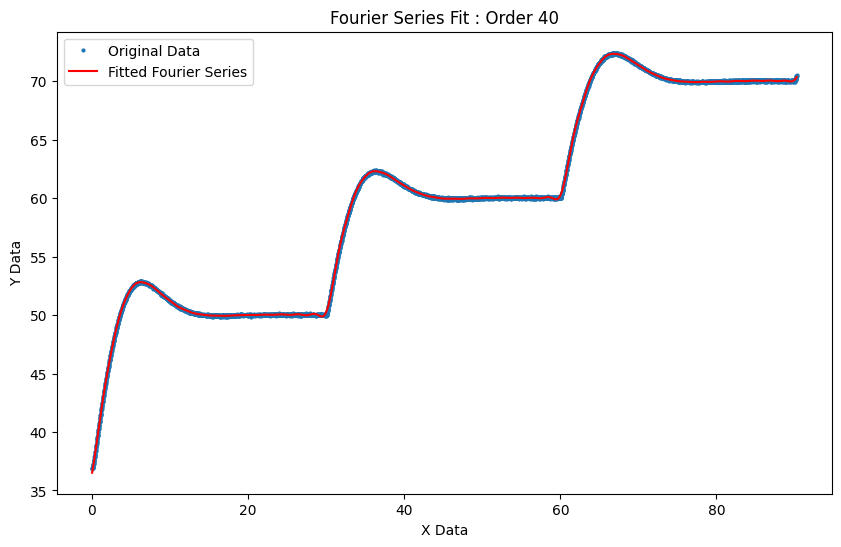

Fitted parameters for fourier curve part : [-7.87084496e+02  5.77164886e-01  4.25411032e+00 -1.08960127e+00
  1.49769075e+00  1.29773354e+01  1.37315962e+00 -7.45154422e-01
  1.56807475e-01  3.07350239e+00  7.37334724e-01 -3.65942828e-01
  3.54740466e-02 -2.08272735e-01  3.42719060e-02  1.10159346e-01
  4.95850067e-02  3.26064719e-01  2.15757446e-01  6.40424611e-01
  2.86510470e-01  2.23892972e-02 -1.46986969e-02  1.17951694e-01
  6.62573234e-02 -1.37315062e-01  3.21204084e-02  2.99690661e-02
  2.13309785e-02  3.49092136e-02 -1.80649935e-02 -1.05594671e-01
  2.30180415e-03  1.81881614e-02  5.49850188e-03  3.28152051e-02
 -1.07495164e-02  1.44116407e-02  6.02341853e-04 -8.00079175e-02
  6.73702258e-03  3.06442128e-02 -9.07830801e-03 -6.31161109e-02
  6.89818894e-03  1.73256065e-02  3.27300935e-03  1.59970751e-02
 -1.61015553e-03  1.12431873e-02  9.55093623e-04 -4.82983150e-02
  9.21316431e-03  1.47264958e-02 -2.86290331e-03  7.23701200e-03
  9.28806606e-05  1.41013525e-02 -3.39032917e-0

In [90]:
# Plot the original data and the fitted curve
x_fit = xdata
y_fit = ff(x_fit, *params)

plt.figure(figsize=(10, 6))
plt.plot(xdata, ydata, 'o', label='Original Data', markersize=2)
plt.plot(x_fit, y_fit + (model.coef_* xdata + model.intercept_), label='Fitted Fourier Series', color='red')
plt.legend()
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Fourier Series Fit : Order 40')
plt.show()

print("Fitted parameters for fourier curve part :", params)
print("Fitted parameters for linear curve part : coeffitient = " + str(model.coef_) + " ; intercept = " + str(model.intercept_))